In [2]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 4.6 MB/s eta 0:00:00


In [103]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode
import seaborn as sns

In [4]:
cobertura = pd.read_csv('/content/drive/MyDrive/Dados/DW_Cobertura-da-terra/cobertura_formatados.csv')
cobertura.head()

,municipio,cod_municipality,cod_regiao_intermediaria,regiao_intermediaria,cod_regiao_imediata,regiao_imediata,id_classe,nome_classe,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,3,Forest Formation,100546.743913,101306.542189,...,96645.692562,95483.644518,94251.417993,93839.921283,93176.085484,92302.799622,92729.301835,93532.710235,93580.159176,93363.897514
1,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,15,Pasture,5044.903800,4139.367871,...,11054.932377,11603.950761,13055.996662,13341.689949,13942.802844,14916.967394,14151.090292,13445.343754,13185.143045,13071.973225
2,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,39,Soy Beans,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.680636
3,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,41,Other Temporary Crops,0.000000,0.089356,...,31.184249,33.239327,27.073903,32.435191,31.184104,35.205075,28.235472,21.087233,22.516923,55.489021
4,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,48,Other Perennial Crops,638.716826,638.270027,...,1099.478910,2479.081339,2522.146984,2543.948126,2592.109960,2353.357306,2329.767996,2327.712880,2326.283216,2325.121680


In [5]:
cobertura.columns

Index(['municipio', 'cod_municipality', 'cod_regiao_intermediaria',
       'regiao_intermediaria', 'cod_regiao_imediata', 'regiao_imediata',
       'id_classe', 'nome_classe', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [6]:
cobertura = pd.melt(cobertura, id_vars=['municipio', 'cod_municipality', 'cod_regiao_intermediaria',
                                        'regiao_intermediaria', 'cod_regiao_imediata', 'regiao_imediata',
                                        'id_classe', 'nome_classe'], 
                    
                    value_vars=['1985', '1986', '1987', '1988', '1989',
                                '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
                                '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                                '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
                                '2017', '2018', '2019', '2020', '2021'])


In [7]:
cobertura.head()

,municipio,cod_municipality,cod_regiao_intermediaria,regiao_intermediaria,cod_regiao_imediata,regiao_imediata,id_classe,nome_classe,variable,value
0,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,3,Forest Formation,1985,100546.743913
1,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,15,Pasture,1985,5044.903800
2,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,39,Soy Beans,1985,0.000000
3,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,41,Other Temporary Crops,1985,0.000000
4,Abaetetuba,1500107,1501,Belém,150003,Abaetetuba,48,Other Perennial Crops,1985,638.716826


In [8]:
sidra = pd.read_csv('/content/drive/MyDrive/Dados/Dados_SIDRA/table_full.csv')
sidra.head()

,cidade,cod_cidade,nome_rgi,cod_rgi,cod_rgint,nome_rgint,tipo_producao,cod_variavel,variavel,cod_produto,produto,cod_metrica,metrica,valor,ano
0,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,Bovino,24.0,Cabeças,28,1974
1,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,Bovino,24.0,Cabeças,54,1975
2,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,Bovino,24.0,Cabeças,47,1976
3,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,Bovino,24.0,Cabeças,39,1977
4,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,Bovino,24.0,Cabeças,10,1978


In [9]:
list_metrica_old = []

for i in sidra['produto'].unique():
  metrica = sidra.loc[sidra['produto'] == i]['metrica'].unique()
  for j in metrica:
    j = str(j)
    list_metrica_old.append(i + ' - ' + j)
list_metrica_new = list_metrica_old

In [10]:
def replace_string_re(expression, replacement, list_to_use):
  new_column_names = []
  for i in list_to_use:
    new_str = re.sub(r'{}'.format(expression), r'{}'.format(replacement) , i)
    new_column_names.append(new_str)
  return new_column_names

In [11]:
list_metrica_new = replace_string_re('(^[0-9+.$( - )]*)', '', list_metrica_new)
list_metrica_new = replace_string_re('^(- )', '', list_metrica_new)
list_metrica_new = replace_string_re('\*', '', list_metrica_new)
list_metrica_new = replace_string_re('(\b-\b)', '_', list_metrica_new)
list_metrica_new = replace_string_re('(\(|\))', '', list_metrica_new)
list_metrica_new = replace_string_re('( - )', '_', list_metrica_new)
list_metrica_new = replace_string_re('(-)', '_', list_metrica_new)
list_metrica_new = replace_string_re('( )', '_', list_metrica_new)

new_list_metrica = []
for i in list_metrica_new:
  new_str = unidecode(i)
  new_list_metrica.append(new_str.lower())
list_metrica_new = new_list_metrica
#list_metrica = replace_string_re('( - | )', '_', list_metrica)

In [12]:
replacement_dict = dict(zip(list_metrica_old, list_metrica_new))

In [13]:
sidra['metrica'] = sidra['produto'] + ' - ' + sidra['metrica']

In [14]:
sidra.metrica = sidra.metrica.replace(replacement_dict)

In [61]:
sidra['produto'] = sidra['metrica']
sidra.drop(columns = [['metrica', 'cod_metrica']], inplace=True, errors = 'ignore' )

In [58]:
sidra['valor'] = sidra['valor'].replace(to_replace=None, regex={'[^0-9]':0})
sidra['valor'] = sidra['valor'].astype('float64')

In [100]:
sidra.head()

,cidade,cod_cidade,nome_rgi,cod_rgi,cod_rgint,nome_rgint,tipo_producao,cod_variavel,variavel,cod_produto,produto,cod_metrica,valor,ano
0,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,bovino_cabecas,24.0,28.0,1974
1,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,bovino_cabecas,24.0,54.0,1975
2,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,bovino_cabecas,24.0,47.0,1976
3,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,bovino_cabecas,24.0,39.0,1977
4,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105,Efetivo dos rebanhos,2670,bovino_cabecas,24.0,10.0,1978


In [120]:

df_wide.loc[df_wide['variavel'] == 'Efetivo dos rebanhos'].sum()

produto
cod_cidade                                                                                                         51994459680
ano                                                                                                                   69033600
tipo_producao                                                                PecuáriaPecuáriaPecuáriaPecuáriaPecuáriaPecuár...
variavel                                                                     Efetivo dos rebanhosEfetivo dos rebanhosEfetiv...
cod_produto                                                                                                           92448000
acai_hectares                                                                                                                0
acai_toneladas                                                                                                               0
banana_cacho_hectares                                                                                  

In [128]:
list_columns = sidra.loc[sidra['variavel'] == 'Efetivo dos rebanhos']['produto'].unique()
list_columns

array(['bovino_cabecas', 'bubalino_cabecas', 'equino_cabecas',
       'caprino_cabecas', 'ovino_cabecas'], dtype=object)

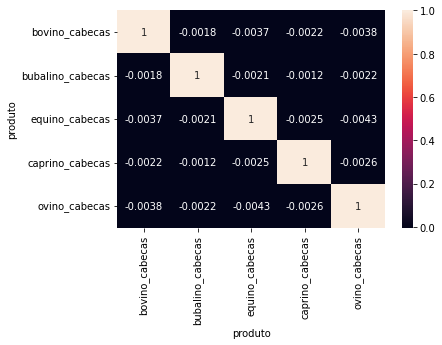

In [130]:
df_wide = pd.pivot_table(sidra, columns = ['produto'], values = 'valor',aggfunc=np.sum,
                        index = ['cod_cidade','ano', 'tipo_producao','variavel', 'cod_produto'], fill_value = 0)
df_wide = df_wide.reset_index()
list_columns = sidra.loc[sidra['variavel'] == 'Efetivo dos rebanhos']['produto'].unique()
sns.heatmap(df_wide[list_columns].corr(), annot=True)

In [65]:
df_wide = pd.pivot_table(df_wide, columns = 'tipo_producao', values = 'valor',aggfunc=np.sum,
                        index = ['cidade', 'cod_cidade', 'nome_rgi', 'cod_rgi', 'cod_rgint',
                                'nome_rgint', 'cod_variavel', 'variavel', 'ano'], fill_value = 0)
df_wide = df_wide.reset_index()
df_wide 

KeyError: ignored